## **History of FIFA World Cups**

We were tasked with selecting a dataset and doing our own analyses using the lessons we learned in our Intro to Python Course. As we were instructed to choose a dataset around a topic we were passionate about, I immediately thought of soccer (and the World Cup), as the US, Canada, and Mexico get ready to host in 2026.

This dataset (found on Kaggle) and courtesy of the FIFA World Cup Archive Website, contains every match that has been played in all previous world cups -- including group stage and the knockout phase.

Below you'll find analyses of some of the most relevant statistics including expected goals, goal scored in the history of the cup, and who is entering the 2026 World Cup with the most wins in history.

### **Importing the necessary Python Langues to be used for coding and further analyses**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the "matches_1930_2022" file that contains the history of all world cup matches
world_cup_matches= pd.read_csv('/content/matches_1930_2022.csv')

#Viewing the first five rows of data to analyze how it would look and what are the important columns to keep.
world_cup_matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [ ]:
#Getting a clear idea of all the columns and their data type.
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [ ]:
world_cup_matches.describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,964.000000,128.000000,35.000000,964.000000,128.000000,35.000000,964.000000,964.000000
mean,1.776971,1.435938,3.285714,1.044606,1.192187,3.057143,45693.374481,1989.244813
std,1.596676,0.860391,1.226459,1.071233,0.809258,1.136115,22704.131689,24.014409
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2000.000000,1930.000000
25%,1.000000,0.800000,3.000000,0.000000,0.600000,2.000000,31800.000000,1974.000000
50%,1.000000,1.300000,3.000000,1.000000,1.000000,3.000000,42725.000000,1994.000000
75%,3.000000,1.925000,4.000000,2.000000,1.525000,4.000000,60984.500000,2010.000000
max,10.000000,5.200000,5.000000,7.000000,5.700000,5.000000,173850.000000,2022.000000


In [ ]:
world_cup_matches.shape

(964, 44)

### **Data Clean Up**

Though this dataset contains plenty of detailed information, for this report, we'll be excluding columns that may not contribute much to the analysis.

In [ ]:
#I took out the columns towards the end, as they included information around yellow cards, substitutes, & own goals.
#-- ^ These being data points that weren't going to be used for this analysis

#To begin with, took our the last 26 columns of data
world_cup_matches= world_cup_matches.iloc[:, :-26]
world_cup_matches.shape
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     964 non-null    object 
 1   away_team     964 non-null    object 
 2   home_score    964 non-null    int64  
 3   home_xg       128 non-null    float64
 4   home_penalty  35 non-null     float64
 5   away_score    964 non-null    int64  
 6   away_xg       128 non-null    float64
 7   away_penalty  35 non-null     float64
 8   home_manager  964 non-null    object 
 9   home_captain  644 non-null    object 
 10  away_manager  964 non-null    object 
 11  away_captain  644 non-null    object 
 12  Attendance    964 non-null    int64  
 13  Venue         964 non-null    object 
 14  Officials     709 non-null    object 
 15  Round         964 non-null    object 
 16  Date          964 non-null    object 
 17  Score         964 non-null    object 
dtypes: float64(4), int64(3), objec

In [ ]:
#After further analyses, I noticed that there are some columns in the middle that weren't going to be used
#Though influential in a game, aspects like "captain" would not add much info, since this analysis is
#around matches, not particular players' performance.

world_cup_matches= world_cup_matches.drop(columns=["home_penalty", "away_penalty", "home_captain", "away_captain", "Officials"])

world_cup_matches= world_cup_matches.reset_index(drop=True)
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     964 non-null    object 
 1   away_team     964 non-null    object 
 2   home_score    964 non-null    int64  
 3   home_xg       128 non-null    float64
 4   away_score    964 non-null    int64  
 5   away_xg       128 non-null    float64
 6   home_manager  964 non-null    object 
 7   away_manager  964 non-null    object 
 8   Attendance    964 non-null    int64  
 9   Venue         964 non-null    object 
 10  Round         964 non-null    object 
 11  Date          964 non-null    object 
 12  Score         964 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 98.0+ KB


In [ ]:
#From a visualization standpoint, I usually prefer seeing the data/year of the event towards the beginning
#Same goes for the score. Because of this, columns "Date" and "Score" were pushed to the beginning.

world_cup_matches= world_cup_matches[["Date", "Score"] + list(world_cup_matches.columns[:-2])]
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          964 non-null    object 
 1   Score         964 non-null    object 
 2   home_team     964 non-null    object 
 3   away_team     964 non-null    object 
 4   home_score    964 non-null    int64  
 5   home_xg       128 non-null    float64
 6   away_score    964 non-null    int64  
 7   away_xg       128 non-null    float64
 8   home_manager  964 non-null    object 
 9   away_manager  964 non-null    object 
 10  Attendance    964 non-null    int64  
 11  Venue         964 non-null    object 
 12  Round         964 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 98.0+ KB


In [ ]:
#Wanted to see the new layout after re-distributing columns towards the beginning.
world_cup_matches.head()

,Date,Score,home_team,away_team,home_score,home_xg,away_score,away_xg,home_manager,away_manager,Attendance,Venue,Round
0,2022-12-18,(4) 3–3 (2),Argentina,France,3,3.3,3,2.2,Lionel Scaloni,Didier Deschamps,88966,"Lusail Iconic Stadium, Lusail",Final
1,2022-12-17,2–1,Croatia,Morocco,2,0.7,1,1.2,Zlatko Dalić,Hoalid Regragui,44137,"Khalifa International Stadium, Doha",Third-place match
2,2022-12-14,2–0,France,Morocco,2,2.0,0,0.9,Didier Deschamps,Hoalid Regragui,68294,"Al Bayt Stadium, Al Khor",Semi-finals
3,2022-12-13,3–0,Argentina,Croatia,3,2.3,0,0.5,Lionel Scaloni,Zlatko Dalić,88966,"Lusail Iconic Stadium, Lusail",Semi-finals
4,2022-12-10,1–0,Morocco,Portugal,1,1.4,0,0.9,Hoalid Regragui,Fernando Santos,44198,"Al Thumama Stadium, ath-Thumāma",Quarter-finals


In [ ]:
#Next, examining if there is any data missing from any particular columns
world_cup_matches.isnull().sum()

,0
Date,0
Score,0
home_team,0
away_team,0
home_score,0
home_xg,836
away_score,0
away_xg,836
home_manager,0
away_manager,0


From the table above that shows the null values, we can see that "home_xg" and "away_xg" columns contain 836 data points missing (out of the 964 total).

It is important to first describe what can be understood by "xg" which stands for "**expected goals**."

**Expected goals** is a metric that estimates the probability of a chance being converted into a goal. Factors like the shot distance, angle, type of shot all play a role on whether there is a high or low chance of scoring a goal. The range for a shot is between 0 to 1 where 0 represents a shot with almost null chance of converting, and 1 being an almost guarantee of a goal being scored.

It is also important to note the significance of "home" and "away."

The world cup (played every 4 years) is hosted at a location decided years in advance. Such as Qatar was the host in 2022, Russia in 2018, Brazil in 2014, South Africa in 2010, etc.

The 2026 world cup will be hosted by USA, Mexico, and Canada. So technically speaking, these three countries would be considered "home," but FIFA assigns countries a label of "home" and "away" for scheduling purposes, as well as jersey selection; mimicking the process of teams being **home** (played in their own stadium) or **away**, (played at the other team's home ground).

### **Expected Goals Comparison (2018 vs. 2022)**

The expected goals metric was introduced at the 2018 world cup, and it is one of the more important metrics used today in the world of soccer. It provides insight on the level of play by that team, according to the type of chances that they created throughout the game. Even though expected goals data is only included for the previous two world cups, due to its relevance, we will keep these data points for further analysis.



In [ ]:
# Wanting to get the year out of the date, so that it's easier to filter and visualize
world_cup_matches["Date"] = pd.to_datetime(world_cup_matches["Date"])

world_cup_matches["Year"] = world_cup_matches["Date"].dt.year

world_cup_matches= world_cup_matches[["Year"] + list(world_cup_matches.columns[:-1])]

world_cup_matches.head()

,Year,Date,Score,home_team,away_team,home_score,home_xg,away_score,away_xg,home_manager,away_manager,Attendance,Venue,Round
0,2022,2022-12-18,(4) 3–3 (2),Argentina,France,3,3.3,3,2.2,Lionel Scaloni,Didier Deschamps,88966,"Lusail Iconic Stadium, Lusail",Final
1,2022,2022-12-17,2–1,Croatia,Morocco,2,0.7,1,1.2,Zlatko Dalić,Hoalid Regragui,44137,"Khalifa International Stadium, Doha",Third-place match
2,2022,2022-12-14,2–0,France,Morocco,2,2.0,0,0.9,Didier Deschamps,Hoalid Regragui,68294,"Al Bayt Stadium, Al Khor",Semi-finals
3,2022,2022-12-13,3–0,Argentina,Croatia,3,2.3,0,0.5,Lionel Scaloni,Zlatko Dalić,88966,"Lusail Iconic Stadium, Lusail",Semi-finals
4,2022,2022-12-10,1–0,Morocco,Portugal,1,1.4,0,0.9,Hoalid Regragui,Fernando Santos,44198,"Al Thumama Stadium, ath-Thumāma",Quarter-finals


For visualization purposes, it is easier to filter out the relevant columns and calculate from there.

**The objective here is to calculate how many expected goals there were per game in each Worl Cup Round.**

*For example, in 2018 what was the average expected goals for a match in the group stage round, etc.*

Knowing this allows us to analyze teams' performance compared to the level of stakes that are being played in the World Cup. The group stage round has 3 games, and teams may be more willing to risks and making mistakes, however when getting to the knockout stage, teams could be playing more defensive in order to maintain a clean sheet and win with a lower margin (low error rate).

**Because of this, I hypothesize that the later it is in the World Cup, the lower expected goals per game there will be.**

In [ ]:
matches_2018_2022= world_cup_matches[world_cup_matches["Year"].isin([2018, 2022])]

expected_goals_2018_2022= matches_2018_2022[["Year", "Round", "home_xg", "away_xg"]]

expected_goals_2018_2022["sum"]= expected_goals_2018_2022["home_xg"] + expected_goals_2018_2022["away_xg"]

expected_goals_per_stage= expected_goals_2018_2022.groupby(["Year", "Round"])["sum"].mean()

print(expected_goals_per_stage)

Year  Round            
2018  Final                2.200000
      Group stage          2.637500
      Quarter-finals       2.225000
      Round of 16          2.762500
      Semi-finals          2.200000
      Third-place match    2.500000
2022  Final                5.500000
      Group stage          2.566667
      Quarter-finals       2.800000
      Round of 16          2.775000
      Semi-finals          2.850000
      Third-place match    1.900000
Name: sum, dtype: float64


<ipython-input-21-db955d58f064>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_goals_2018_2022["sum"]= expected_goals_2018_2022["home_xg"] + expected_goals_2018_2022["away_xg"]


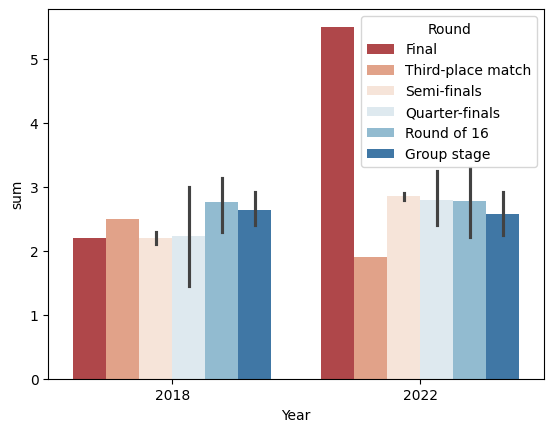

In [ ]:
sns.barplot(data=expected_goals_2018_2022, x="Year", y="sum", hue="Round", palette= "RdBu");

We can notice that in **2018**, (excluding the Round of 16), the hypothesis is correct in that the later the stage it is in the World Cup, the less expected goals there are per game. The "Third Place Match" can be disregarded since it is a one-off game for the semifinal losing teams (with very little to play for, considering the trophy is not on the line anymore).

Now in 2022, we see the complete opposite and the null hypothesis is rejected. As the World Cup rounds progressed, the more expected goals per game was seen. From a fanatic standpoint, this is always more entertaining, as one of the key highlights of a game is the ball entering the net.

If expected goals haven't been tracked in the past, I was curious to see the actual number of goals per game and what World Cups have the matches with the maximum total of goals in a match.

### **Highest Scoring Games in World Cup History**

In [ ]:
world_cup_matches["total_goals_per_match"] = world_cup_matches["home_score"] + world_cup_matches["away_score"]

highest_scoring_matches = world_cup_matches.sort_values(by="total_goals_per_match", ascending=False).head(5)[["Year", "Round", "home_team", "away_team", "home_score", "away_score", "total_goals_per_match"]]

print(highest_scoring_matches)

     Year              Round    home_team    away_team  home_score  \
870  1954     Quarter-finals  Switzerland      Austria           5   
926  1938        Round of 16       Brazil       Poland           6   
651  1982  First group stage      Hungary  El Salvador          10   
873  1954        Group stage      Hungary      Germany           8   
861  1958        Group stage       France     Paraguay           7   

     away_score  total_goals_per_match  
870           7                     12  
926           5                     11  
651           1                     11  
873           3                     11  
861           3                     10  


In [ ]:
#Wanting to see the table all in one line
print(highest_scoring_matches.to_string(index=False))

 Year             Round   home_team   away_team  home_score  away_score  total_goals_per_match
 1954    Quarter-finals Switzerland     Austria           5           7                     12
 1938       Round of 16      Brazil      Poland           6           5                     11
 1982 First group stage     Hungary El Salvador          10           1                     11
 1954       Group stage     Hungary     Germany           8           3                     11
 1958       Group stage      France    Paraguay           7           3                     10


No sight of a top 5 highest scoring game from any recent World Cup. Let's see where 2022 ranks in terms of highest number of goals in TOTAL for a World Cup.

 ### **Total Goals in a World Cup**

Ranked from highest number of goals to lowest, which World Cup had the highest number of goals in history?

In [ ]:
total_goals_per_world_cup = world_cup_matches.groupby("Year")["total_goals_per_match"].sum()

total_goals_per_world_cup_sorted = total_goals_per_world_cup.sort_values(ascending=False)

print(total_goals_per_world_cup_sorted)

Year
2022    172
1998    171
2014    171
2018    169
2002    161
2006    147
1982    146
2010    145
1994    141
1954    140
1986    132
1958    126
1990    115
1978    102
1974     97
1970     95
1966     89
1962     89
1950     88
1938     84
1934     70
1930     70
Name: total_goals_per_match, dtype: int64


As evidenced above, the **2022 World Cup** had the highest number of goals scored in history *(thanks to a 3-3 scoreline in the final between Argentina and France*).

In chronological order, how many goals have been scored in each World Cup?

In [ ]:
print(total_goals_per_world_cup)

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990    115
1994    141
1998    171
2002    161
2006    147
2010    145
2014    171
2018    169
2022    172
Name: total_goals_per_match, dtype: int64


Shown in a Scatter Plot:

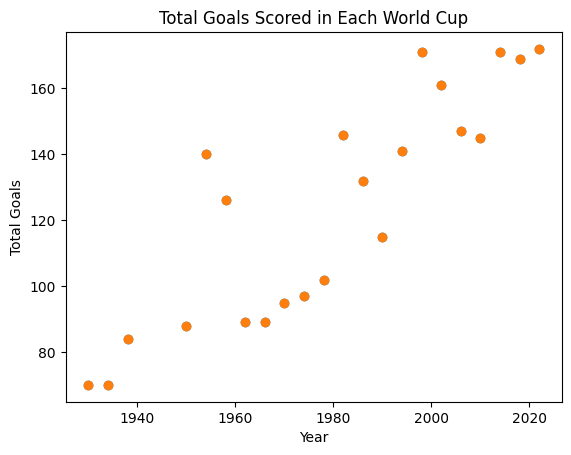

In [ ]:
plt.scatter(total_goals_per_world_cup.index, total_goals_per_world_cup.values)
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Total Goals Scored in Each World Cup")
plt.scatter(total_goals_per_world_cup.index, total_goals_per_world_cup.values)
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Total Goals Scored in Each World Cup")
plt.show()

Analyzing the highest scoring matches in the history of the World Cup, and viewing the total goals scored in each World Cup, we can see that the Qatar 2022 World Cup was one of the more entertaining ones because of the high number of goals.

Even though fans didn't see a record-setting game in terms of highest number of goals, the goals were distributed throughout the games, which allowed the 2022 World Cup to be the cup where the ball hit the back of the net the most.

To note: In the 2022 World Cup, FIFA decided to implement stricter rules regarding how much time is added for injury time. As noted in [this article](https://www.cbssports.com/soccer/news/world-cup-overtime-rules-how-do-extra-time-substitutions-and-penalty-shootouts-work/) by CBS Sports:

*"The issue of matches with fewer than 50 minutes of actual playing time is something that has been going on for a while now," said Collina. "People want to watch football, more football. And we, FIFA and IFAB have been asked to do something about it for years."*

The added time compared to previous World Cups also indicates why there could be a higher number of goals.

Additionally, the reason there's a stark difference between the early years of the World Cup vs the recent World Cups is the change of rules. From 1930 to 1994, no more than 24 teams used to participate. Starting in 1998, the teams increased to 32, and starting in 2026 (the world cup hosted by the US, Mexico, and Canada), there'll be 48 teams participating. Which means more games, and undeniably more goals -- especially by the current world cup holder: Argentina

### **The Current Champion: Argentina**

Argentina became a World Champion in 2022 for the first time since 1986, when Maradona took them to glory in Mexico. This time, led by Lionel Messi, they were able to obtain the trophy that was denied to them in 2014 when they lost in the final to Germany.

Argentina deserves close analysis because they are one of the contenders to lift the trophy once again. And as we saw in the 2022 World Cup, Argentina always delivers when it comes to goals. Let's look at their total goals scored per World Cup throughout history.

In [ ]:
#In order to obtain Argentina's matches, we set the home team and away team == to Argentina
argentina_world_cup_matches = world_cup_matches[(world_cup_matches["home_team"] == "Argentina") | (world_cup_matches["away_team"] == "Argentina")]

#Then we build this chain to obtain Argentina's scores both when they were the home team and away team.
def argentina_goals_scored(x):
    if x["home_team"] == "Argentina":
        return x["home_score"]
    elif x["away_team"] == "Argentina":
        return x["away_score"]

argentina_world_cup_matches["goals_scored"] = argentina_world_cup_matches.apply(argentina_goals_scored, axis=1)

argentina_goals_per_world_cup = argentina_world_cup_matches.groupby("Year")["goals_scored"].sum()

print(argentina_goals_per_world_cup)


Year
1930    18
1934     2
1958     5
1962     2
1966     4
1974     9
1978    15
1982     8
1986    14
1990     5
1994     8
1998    10
2002     2
2006    11
2010    10
2014     8
2018     6
2022    15
Name: goals_scored, dtype: int64


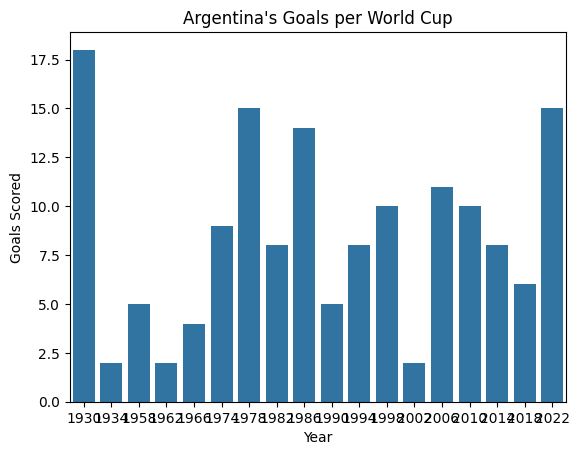

In [ ]:
argentina_goals_per_world_cup = argentina_goals_per_world_cup.reset_index()
sns.barplot(data=argentina_goals_per_world_cup, x="Year", y="goals_scored");
plt.title("Argentina's Goals per World Cup");
plt.xlabel("Year");
plt.ylabel("Goals Scored");
plt.show()

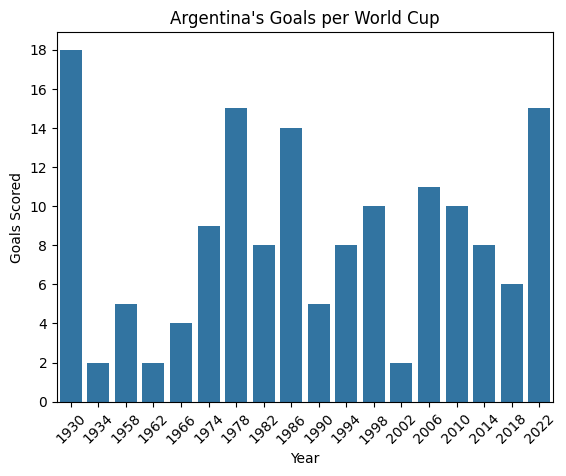

In [ ]:
# The axis at the bottom are too clustered, so need to fix.
# Also, the y axis should not have 0.5s, since goals are only whole numbers.

sns.barplot(data=argentina_goals_per_world_cup, x="Year", y="goals_scored");
plt.title("Argentina's Goals per World Cup");
plt.xlabel("Year");
plt.ylabel("Goals Scored");
plt.xticks(rotation=45);
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True));
plt.show()


Argentina does score a lot of goals in World Cups, but how do they end up winning the game? And how do they compare to other nations?

Let's look at the Top 10 countries with the most wins in World Cup History.

In [ ]:
def match_winner(x):
  if x["home_score"] > x["away_score"]:
    return x["home_team"]
  elif x["away_score"] > x["home_score"]:
    return x["away_team"]

world_cup_matches["winner"]= world_cup_matches.apply(match_winner, axis=1)

wins_by_country= world_cup_matches["winner"].value_counts()

top_winning_countries= wins_by_country.head(10)

print(top_winning_countries)

winner
Brazil          76
Argentina       47
Italy           45
France          39
Germany         37
England         32
Spain           31
West Germany    31
Netherlands     30
Uruguay         25
Name: count, dtype: int64


It would be interesting to add the 2026 World Cup Host nations, see how they compare to the Top 10.

In [ ]:
top_winning_countries= wins_by_country.head(10).index.tolist()

top_winning_countries.extend(["Mexico", "Canada", "United States"])

wins_by_country_plus_hosts= wins_by_country[wins_by_country.index.isin(top_winning_countries)]

print(wins_by_country_plus_hosts)

winner
Brazil           76
Argentina        47
Italy            45
France           39
Germany          37
England          32
Spain            31
West Germany     31
Netherlands      30
Uruguay          25
Mexico           17
United States     9
Name: count, dtype: int64


It is noteworthy that even though Canada was filtered to be included in the list for number of wins in the world cup, they do not come up, since they have not won a match in their two times they've participated (1986 and 2022).

Visualizing the above table into a pie chart, below:

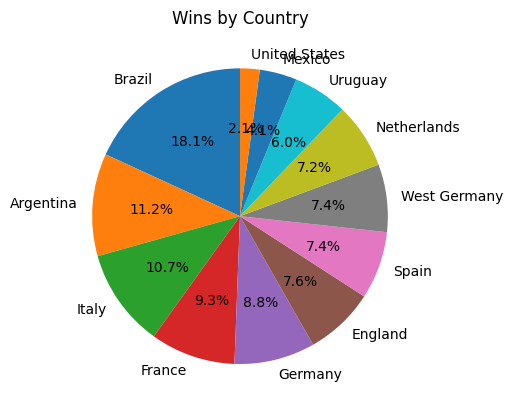

In [ ]:
# Modify your plt.pie call
plt.pie(wins_by_country_plus_hosts, labels=wins_by_country_plus_hosts.index, autopct="%1.1f%%", startangle=90);
plt.title("Wins by Country");
plt.show()


The two countries with the most World Cup Wins are **Brazil and Argentina**

Will we see the bitter rivals face each other in the final at the 2026 World Cup?

### **Thank you for viewing this analysis.**

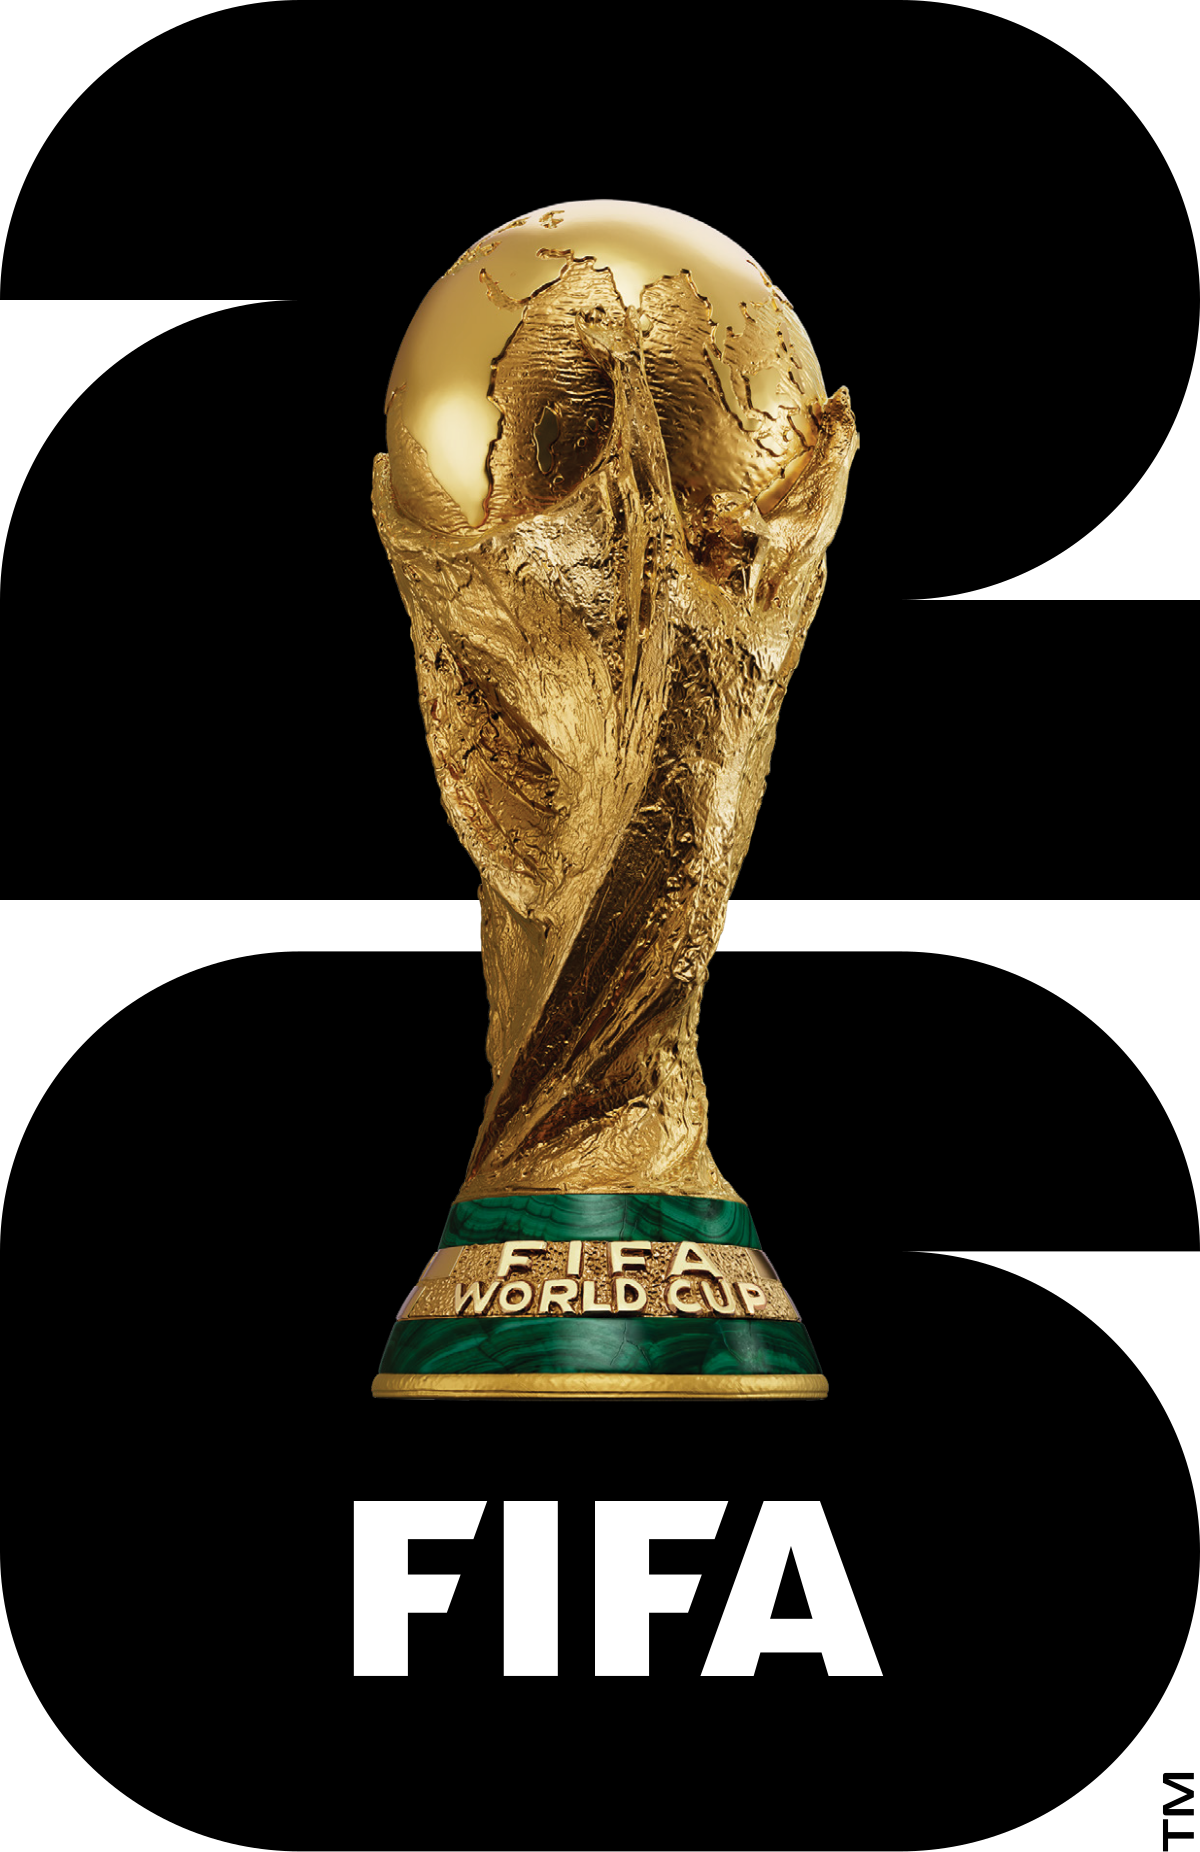